Ev Fiyatları verilerini Kaggle'dan indirin.

Verilerinizi eğitim ve test kümelerine ayırın.

Modelinizi eğitim kümesinden önceki derste olduğu gibi oluşturun. Modelinizin uygunluğunu değerlendirin.

Test kümesindeki ev fiyatlarını tahmin edin ve bu derste belirttiğimiz metrikleri kullanarak modelinizin performansını değerlendirin.

Modelinizin performansı tatmin edici mi? Açıklayın.

Bazı değişkenleri ekleyerek veya çıkararak modelinizi tahmin performansı açısından geliştirmeye çalışın

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.preprocessing import scale

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [85]:
pd.options.display.max_columns = None

house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [86]:
#önce kategorik değişkenleri dönüştürerek baslayalım.
KitchenQual = {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["KitchenQual"] = house["KitchenQual"].map(KitchenQual)

ExterQual = {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["ExterQual"] = house["ExterQual"].map(ExterQual)

ExterCond = {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["ExterCond"] = house["ExterCond"].map(ExterCond)

HeatingQC = {"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["HeatingQC"] = house["HeatingQC"].map(HeatingQC)

FireplaceQu = {"NA":0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
house["FireplaceQu"] = house["FireplaceQu"].map(FireplaceQu)

In [87]:
#kategorik değişkenleri get_dummies ile dönüştürelim
get_dummies_house = pd.get_dummies(house,drop_first=True)


In [88]:
# sonra da değişken değerlerini standartlaştıralım.

house_names=get_dummies_house.select_dtypes(include=["float","integer"]).columns
house_scaled_df = scale(get_dummies_house[house_names])
house_scaled_df = pd.DataFrame(house_scaled_df,columns=house_names)

In [89]:
#SlePrice değişkeni ile en cok korelasyonu olan ilk 30 değişkene bakalım.
house_corr=house_scaled_df.corr().SalePrice.abs().sort_values(ascending=False).index[0:30]
house_scaled_df[house_corr].corr().SalePrice.head()

SalePrice     1.000
OverallQual   0.791
GrLivArea     0.709
ExterQual     0.683
KitchenQual   0.660
Name: SalePrice, dtype: float64

In [90]:
#SalePrice hedef değişkeni ile en yüksek collinearitye sahip olup aralarında multicollinearity 
#düşük olan değişkenler üzerinden model kuralım.

house_scaled_df[['OverallQual', 'GrLivArea', 'KitchenQual',
       'GarageCars', 'YearBuilt',  'Foundation_PConc',
        'Fireplaces','BsmtFinType1_GLQ', 'HeatingQC','Neighborhood_NridgHt',"TotalBsmtSF", 'BsmtFinSF1', 'SaleType_New',
       'GarageType_Detchd', 'SaleCondition_Partial', 'LotFrontage',
       'Foundation_CBlock', 'GarageType_Attchd']].corr().head()

,OverallQual,GrLivArea,KitchenQual,GarageCars,YearBuilt,Foundation_PConc,Fireplaces,BsmtFinType1_GLQ,HeatingQC,Neighborhood_NridgHt,TotalBsmtSF,BsmtFinSF1,SaleType_New,GarageType_Detchd,SaleCondition_Partial,LotFrontage,Foundation_CBlock,GarageType_Attchd
OverallQual,1.000,0.593,0.673,0.601,0.572,0.568,0.397,0.433,0.457,0.369,0.538,0.240,0.327,-0.337,0.323,0.252,-0.430,0.358
GrLivArea,0.593,1.000,0.421,0.467,0.199,0.293,0.462,0.194,0.255,0.180,0.455,0.208,0.168,-0.232,0.163,0.403,-0.267,0.140
KitchenQual,0.673,0.421,1.000,0.510,0.530,0.538,0.256,0.420,0.504,0.354,0.433,0.228,0.338,-0.269,0.340,0.182,-0.401,0.273
GarageCars,0.601,0.467,0.510,1.000,0.538,0.453,0.301,0.321,0.325,0.283,0.435,0.224,0.286,-0.153,0.282,0.286,-0.319,0.321
YearBuilt,0.572,0.199,0.530,0.538,1.000,0.651,0.148,0.479,0.449,0.269,0.391,0.250,0.347,-0.487,0.344,0.123,-0.291,0.472


### Model 1

In [91]:
Y = house_scaled_df["SalePrice"]
X = house_scaled_df[['Foundation_PConc',
        'Fireplaces','BsmtFinType1_GLQ', "TotalBsmtSF",'HeatingQC','Neighborhood_NridgHt', 'BsmtFinSF1', 'SaleType_New',
       'GarageType_Detchd']]

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=465)

print("X_train gözlem sayisi {}".format(X_train.shape[0]))
print("X_test gözlem sayisi {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train,X_train).fit()
results.summary()

X_train gözlem sayisi 1168
X_test gözlem sayisi 292


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sat, 24 Apr 2021   Prob (F-statistic):          5.39e-227
Time:                        00:27:12   Log-Likelihood:                -1091.2
No. Observations:                1168   AIC:                             2202.
Df Residuals:                    1158   BIC:                             2253.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0040      0.018     -0.222      0.824      -0.040       0.032
Foundation_PConc         0.1811      0.024      7.590      0.000       0.134       0.228
Fireplaces               0.2683      0.020     13.568      0.000       0.230       0.307
BsmtFinType1_GLQ         0.1223      0.024      5.150      0.000       0.076       0.169
TotalBsmtSF              0.2695      0.024     11.219      0.000       0.222       0.317
HeatingQC                0.1155      0.021      5.371      0.000       0.073       0.158
Neighborhood_NridgHt     0.1421      0.019      7.407      0.000       0.104       0.180
BsmtFinSF1               0.0176      0.024      0.722      0.470      -0.030       0.066
SaleType_New             0.1063      0.020      5.322      0.000       0.067       0.146
GarageType_Detchd       -0.0532      0.020     -2.698      0.007      -0.092      -0.015
==============================================================================
Omnibus:                      434.870   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10744.376
Skew:                           1.147   Prob(JB):                         0.00
Kurtosis:                      17.680   Cond. No.                         3.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model tatmin edici değil.Hedef değişken üzerinde etkili olduğunu düşündüğümüz değişkenlerden eklemeliyiz.

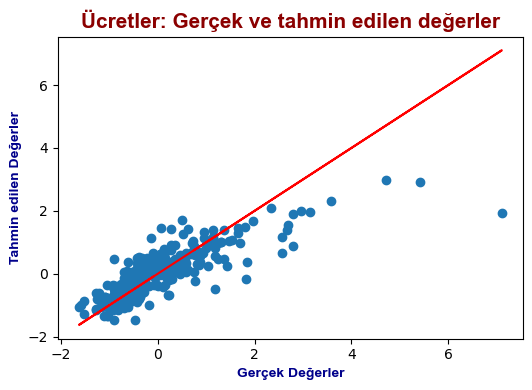

Ortalama Mutlak Hata (MAE)        : 0.40157755756672436
Ortalama Kare Hata (MSE)          : 0.38115676823263195
Kök Ortalama Kare Hata (RMSE)     : 0.6173789502668778
Ortalama Mutlak Yüzde Hata (MAPE) : 504.87292680218826


In [92]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

### Model 2

ilk modele ,hedef değişkenle ilişkisi olan 'GarageCars', 'YearBuilt' değişkenlerini modele ekleyip inceleyelim

In [93]:
Y = house_scaled_df["SalePrice"]
X = house_scaled_df[['GarageCars', 'YearBuilt',  'Foundation_PConc',
        'Fireplaces','BsmtFinType1_GLQ', "TotalBsmtSF",'HeatingQC','Neighborhood_NridgHt', 'BsmtFinSF1', 'SaleType_New',
       'GarageType_Detchd']]

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=465)

print("X_train gözlem sayisi {}".format(X_train.shape[0]))
print("X_test gözlem sayisi {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train,X_train).fit()
results.summary()

X_train gözlem sayisi 1168
X_test gözlem sayisi 292


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     213.9
Date:                Sat, 24 Apr 2021   Prob (F-statistic):          1.81e-269
Time:                        00:27:17   Log-Likelihood:                -986.56
No. Observations:                1168   AIC:                             1997.
Df Residuals:                    1156   BIC:                             2058.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0049      0.017     -0.296      0.767      -0.037       0.028
GarageCars               0.3221      0.022     14.637      0.000       0.279       0.365
YearBuilt               -0.0350      0.027     -1.313      0.190      -0.087       0.017
Foundation_PConc         0.1106      0.024      4.549      0.000       0.063       0.158
Fireplaces               0.2066      0.019     11.053      0.000       0.170       0.243
BsmtFinType1_GLQ         0.0958      0.022      4.340      0.000       0.053       0.139
TotalBsmtSF              0.2026      0.022      9.031      0.000       0.159       0.247
HeatingQC                0.0996      0.020      5.032      0.000       0.061       0.138
Neighborhood_NridgHt     0.1158      0.018      6.562      0.000       0.081       0.150
BsmtFinSF1               0.0228      0.022      1.018      0.309      -0.021       0.067
SaleType_New             0.0753      0.019      4.063      0.000       0.039       0.112
GarageType_Detchd       -0.0893      0.020     -4.519      0.000      -0.128      -0.051
==============================================================================
Omnibus:                      504.506   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10975.219
Skew:                           1.469   Prob(JB):                         0.00
Kurtosis:                      17.727   Cond. No.                         3.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ilk modele göre hedef değişkenini açıklama oranı daha iyidir.Şimdi de modelimizin ne kadar iyi tahmin ettiğine bakalım.

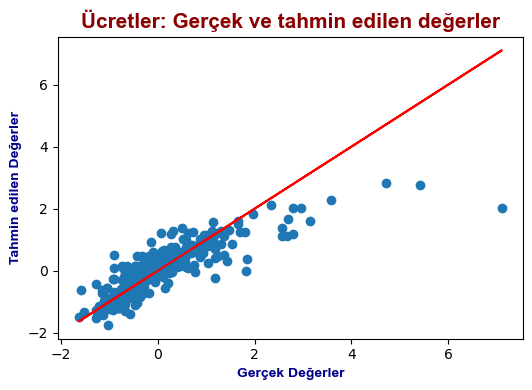

Ortalama Mutlak Hata (MAE)        : 0.3768149883431481
Ortalama Kare Hata (MSE)          : 0.3507356591566624
Kök Ortalama Kare Hata (RMSE)     : 0.5922293974100428
Ortalama Mutlak Yüzde Hata (MAPE) : 422.8226177844707


In [94]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)


plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

hem grafiğe hem de hata değerlerine bakıldığında ilk modelden daha iyidir.Son modelimizi olusturalım.

### Model 3

Modele etkisinin diğerlerinden daha cok olduğunu düşündüğümüz 'OverallQual', 'GrLivArea' değişkenleri ekleyip inceleyelim.

In [95]:
Y = house_scaled_df["SalePrice"]
X = house_scaled_df[['OverallQual', 'GrLivArea', 'KitchenQual',
       'GarageCars', 'YearBuilt', 'Fireplaces','BsmtFinType1_GLQ', "TotalBsmtSF",'HeatingQC','Neighborhood_NridgHt', 'BsmtFinSF1', 'SaleType_New',
       'GarageType_Detchd']]

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=465)

print("X_train gözlem sayisi {}".format(X_train.shape[0]))
print("X_test gözlem sayisi {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)
results = sm.OLS(y_train,X_train).fit()
results.summary()

X_train gözlem sayisi 1168
X_test gözlem sayisi 292


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     354.2
Date:                Sat, 24 Apr 2021   Prob (F-statistic):               0.00
Time:                        00:27:23   Log-Likelihood:                -696.11
No. Observations:                1168   AIC:                             1420.
Df Residuals:                    1154   BIC:                             1491.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0107      0.013     -0.830      0.407      -0.036       0.015
OverallQual              0.2598      0.023     11.146      0.000       0.214       0.306
GrLivArea                0.3071      0.018     16.859      0.000       0.271       0.343
KitchenQual              0.1009      0.019      5.404      0.000       0.064       0.138
GarageCars               0.1382      0.018      7.491      0.000       0.102       0.174
YearBuilt                0.0407      0.021      1.982      0.048       0.000       0.081
Fireplaces               0.0700      0.015      4.541      0.000       0.040       0.100
BsmtFinType1_GLQ         0.0445      0.017      2.584      0.010       0.011       0.078
TotalBsmtSF              0.0518      0.018      2.818      0.005       0.016       0.088
HeatingQC                0.0300      0.016      1.911      0.056      -0.001       0.061
Neighborhood_NridgHt     0.0857      0.014      6.105      0.000       0.058       0.113
BsmtFinSF1               0.0708      0.017      4.067      0.000       0.037       0.105
SaleType_New             0.0541      0.014      3.738      0.000       0.026       0.082
GarageType_Detchd       -0.0374      0.016     -2.398      0.017      -0.068      -0.007
==============================================================================
Omnibus:                      487.333   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68482.717
Skew:                          -0.851   Prob(JB):                         0.00
Kurtosis:                      40.474   Cond. No.                         4.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

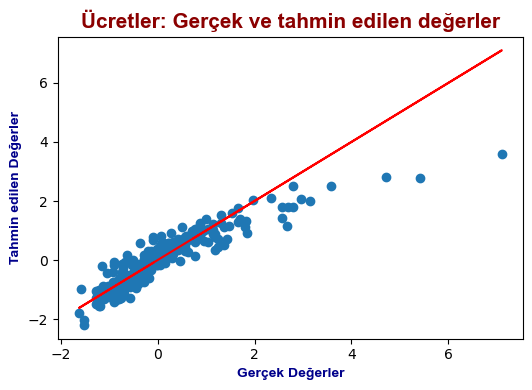

Ortalama Mutlak Hata (MAE)        : 0.29504520096852305
Ortalama Kare Hata (MSE)          : 0.20812374768145253
Kök Ortalama Kare Hata (RMSE)     : 0.45620581723762854
Ortalama Mutlak Yüzde Hata (MAPE) : 152.83798885997885


In [96]:
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

baslik_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
eksen_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(dpi = 100)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler", fontdict=eksen_font)
plt.ylabel("Tahmin edilen Değerler", fontdict=eksen_font)
plt.title("Ücretler: Gerçek ve tahmin edilen değerler", fontdict=baslik_font)
plt.show()

print("Ortalama Mutlak Hata (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Ortalama Kare Hata (MSE)          : {}".format(mse(y_test, y_preds)))
print("Kök Ortalama Kare Hata (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Ortalama Mutlak Yüzde Hata (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

3.modelin test kümesi performansı,kullandığımız dört metriğin tümüne göre  1. ve 2. modelin test kümesi performansından daha iyidir.Grafikler de incelendiğinde önceki modellere kıyasla,3. modelin değerleri daha iyi tahmin ettiği görülmektedir çünkü noktalar kırmızı çizginin etrafında daha sıkı bir şekilde kümelenmiştir.